In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##load 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
def image_show(train_image,train_label, number):
    plt.imshow(train_image[number])
    plt.title(train_label[number])
    plt.show()

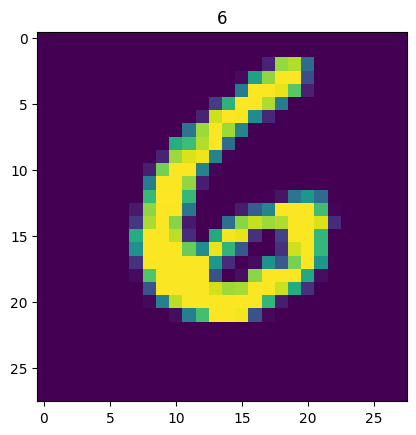

In [8]:
image_show(train_images, train_labels, 90)

In [10]:
##normalise 
train_images = train_images / 255.0
test_images = test_images / 255.0
# train_images[0]

In [11]:
##exapnd dimension to addd a channel for grey scale image 
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [12]:
##one hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# train_labels[0]

In [13]:
##model define 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                          input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(test_images, test_labels),
    validation_split=0.1
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5140 - loss: 1.3611 - val_accuracy: 0.9126 - val_loss: 0.2864
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9177 - loss: 0.2705 - val_accuracy: 0.9500 - val_loss: 0.1595
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9504 - loss: 0.1589 - val_accuracy: 0.9637 - val_loss: 0.1175
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9648 - loss: 0.1124 - val_accuracy: 0.9736 - val_loss: 0.0842
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9726 - loss: 0.0881 - val_accuracy: 0.9769 - val_loss: 0.0788


In [ ]:
##perdict , 
##test data prediction